In [60]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from pathlib import Path

In [61]:
cwd = Path.cwd()
def loadData(cutoff, sample_size=-1, random_state=0):
    # Load data
    moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_with_labels', 'rb'))
    #print(moondf.head())
    usedf = moondf[moondf['grade'] < cutoff]
    usedf = moondf.drop(["is_benchmark", "repeats"], axis=1)
    if sample_size > 0:
        newdf = pd.DataFrame()
        for i in range(4, cutoff):
            newdf = newdf.append(usedf[usedf['grade'] == i].sample(3000))
        usedf = newdf
    # shuffle data
    usedf = usedf.sample(frac=1, random_state=random_state).reset_index(drop=True)
    #print(usedf.tail())
    X = usedf.drop(['grade'], axis=1).values
    y = usedf['grade'].values
    return X, y

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


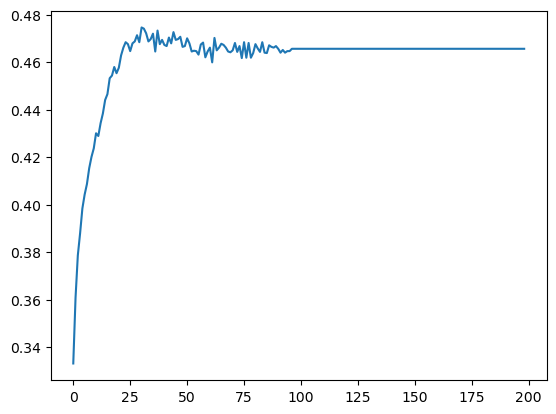

In [62]:
X, y = loadData(15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

acc_list = []
for i in range(1, 200):
    print(i)
    clf = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    acc_list.append(clf.score(X_test, y_test))

plt.plot(acc_list)

In [63]:
X, y = loadData(15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.4697241716990371


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

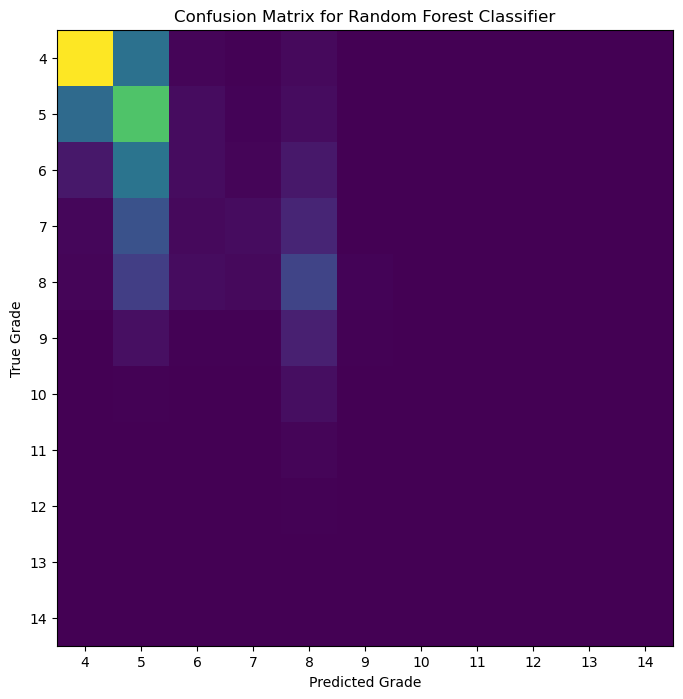

In [64]:
# print the confusion matrix
#print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=clf.classes_, columns=clf.classes_))
fig = plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix(y_test, y_pred))
plt.xticks(np.arange(11), np.arange(4, 15))
plt.yticks(np.arange(11), np.arange(4, 15))
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix for Random Forest Classifier')

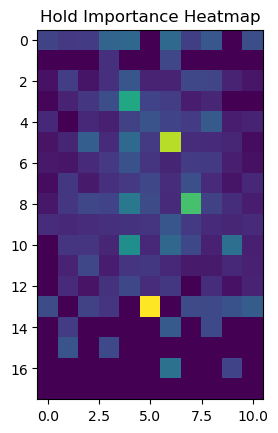

In [65]:
# Plot the feature importance
unique_holds = pickle.load(open(cwd / '..' / 'raw_data' / 'unique_holds', 'rb'))
importances = clf.feature_importances_

importance_map = np.zeros((11, 18))
for i in range(len(unique_holds)):
    hold = unique_holds[i]
    importance_map[hold[0], hold[1]] = importances[i]
    
plt.title('Hold Importance Heatmap')
plt.imshow(importance_map.T[::-1], interpolation='none')

In [66]:
# make the usedf have the same amount of each grade 4-8
X_eq, y_eq = loadData(9, 3000)
X_train_eq, X_test_eq, y_train_eq, y_test_eq = train_test_split(X_eq, y_eq, test_size=0.20, random_state=42)

clfeq = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=42)

clfeq.fit(X_train_eq, y_train_eq)

y_pred_eq = clf.predict(X_test_eq)

print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test_eq, y_pred_eq)}")

print(pd.DataFrame(confusion_matrix(y_test_eq, y_pred_eq)))

/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_74865/2865181368.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(usedf[usedf['grade'] == i].sample(3000))
/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_74865/2865181368.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(usedf[usedf['grade'] == i].sample(3000))
/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_74865/2865181368.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(usedf[usedf['grade'] == i].sample(3000))
/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_74865/2865181368.py:11: FutureWarning: The frame.append method is deprecated and will be removed from

Accuracy: 0.849
     0    1    2    3    4  5
0  575   29    1    2    5  0
1   53  521    6    2    5  0
2   20   93  477    4   17  0
3    4   85    7  470   27  1
4    4   70   10    4  504  4
5    0    0    0    0    0  0


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

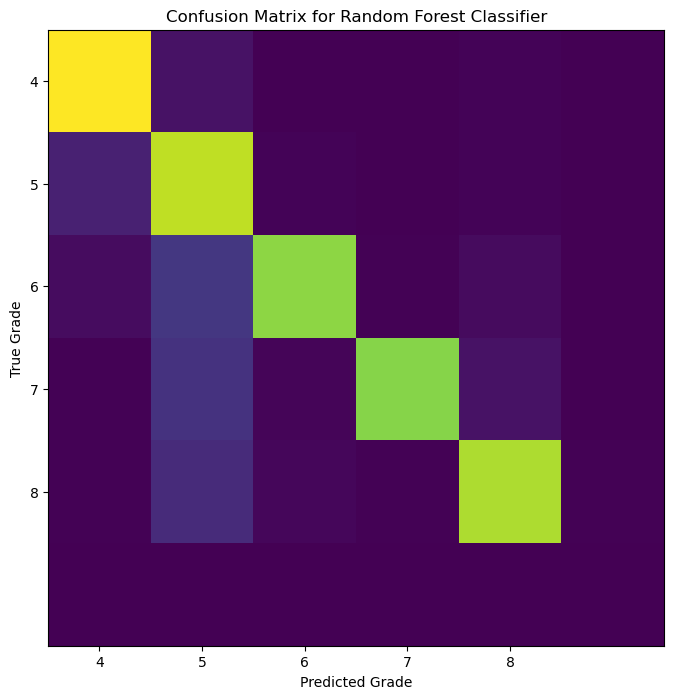

In [67]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix(y_test_eq, y_pred_eq))
plt.xticks(np.arange(5), np.arange(4, 9))
plt.yticks(np.arange(5), np.arange(4, 9))
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix for Random Forest Classifier')

In [68]:
X_tot, y_tot = loadData(9)
print(y_tot)

[11  5  5 ...  6  4  5]


Accuracy: 0.6469167237946006


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

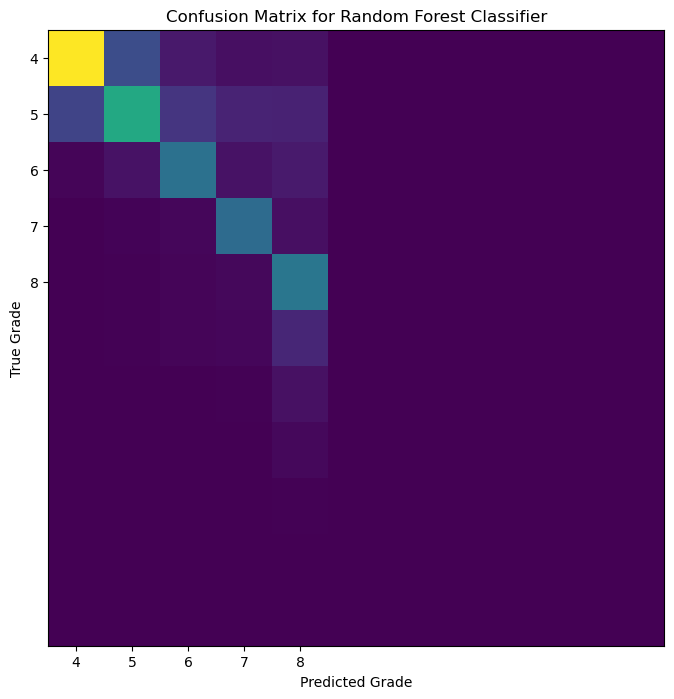

In [69]:
y_pred_tot = clfeq.predict(X_tot)
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_tot, y_pred_tot)}")
fig = plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix(y_tot, y_pred_tot))
plt.xticks(np.arange(5), np.arange(4, 9))
plt.yticks(np.arange(5), np.arange(4, 9))
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix for Random Forest Classifier')